[134056. 132390. 133365. ...      0.      0.      0.]


<IPython.core.display.Javascript object>


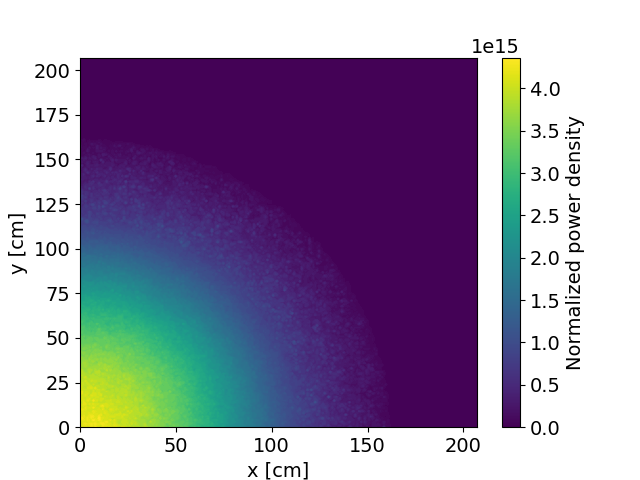

<IPython.core.display.Javascript object>


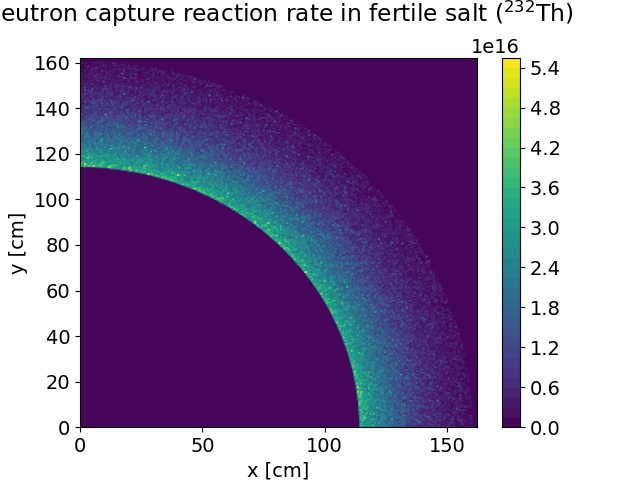

Max power density 139377.0


In [5]:
%matplotlib notebook 
# Import modules
import math
import numpy as np
import scipy
import matplotlib.pyplot
from matplotlib import rcParams, cm
from pyne import serpent
from pyne import nucname
rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 14
det0 = serpent.parse_det('/home/andrei2/Desktop/ornl/msfr/serpent/steady-state/msfr.inp_det0.m')
#det03 = serpent.parse_det('../serpent/core_300K_det0.m')
#det10 = serpent.parse_det('../serpent/detector_plotting/both_900K/core_eq_det0.m')
#det10 = serpent.parse_det('/home/andrei2/Desktop/git/msr-neutronics/RobertsonMSBR/neutronics_paper/reproc/eoc/core_det0.m')
# Power generation distribution
x_pow = det0['DETpowxyX']
y_pow = det0['DETpowxyY']
x_breed = det0['DETbreeding_blankX']
y_breed = det0['DETbreeding_blankY']
pow_den_raw = det0['DETpowxy']
fission_raw = det0['DETfisxy']
breed_raw = det0['DETbreeding_blank']
print (pow_den_raw[:,10])
#fluxxy_raw = det0['DETfluxxy']
#x = det0['DETflux_radX']
#z = det0['DETflux_axialZ']
#flux_rad = det0['DETflux_rad']
#flux_rad_1 = det0['DETflux_rad1']
#flux_rad_2 = det0['DETflux_rad2']
#flux_axial = det0['DETflux_axial']

#eq_flux_rad = det10['DETflux_rad']
#eq_flux_rad_1 = det10['DETflux_rad1']
#eq_flux_rad_2 = det10['DETflux_rad2']
#eq_flux_axial = det10['DETflux_axial']
#tot_flux_rad  = np.reshape (flux_rad[:,1],  (len(x),4))
#fast_flux_rad = np.reshape (flux_rad_1[:,1], (len(x),4))
#ther_flux_rad = np.reshape (flux_rad_2[:,1], (len(x),4))
pow_cell_vol = (449.58-0)*(x_pow[1,0]-x_pow[0,0])   # Volume of POW generation mesh cell
pow_den = np.reshape (pow_den_raw[:,10], (len(x_pow), len(y_pow))) / 1 # No Normalize by max value
fission_den = np.reshape (fission_raw[:,10], (len(x_pow), len(y_pow))) / 1 # No Normalize by max value
#fluxxy = np.reshape (fluxxy_raw[:,10], (len(x_pow), len(y_pow)))     # Normalize by max value
breed_den_0 = np.reshape (breed_raw[:,10], (len(x_breed), len(y_breed)))  # Normalize by total flux
#breed_den = abs(breed_den_0 / fluxxy)
#print x_pow[:,0]
#print pow_cell_vol
#print pow_den
#print tot_flux_rad[:,3]
#print flux_rad_1[:,10]
#print flux_rad[:,11]
#print (breed_den)
'''
#Initialize figure
fig_1 = matplotlib.pyplot.figure(1)
ax = fig_1.add_subplot(111)
ax.grid(True)
#ax.set_ylim(0,1.05)
ax.set_xlim(0.0,345.0)
ax.plot(x[:,2], flux_rad[:,10] / 1e+5, '-', label='Total neutron flux')
#ax.fill_between(x[:,2], flux_rad[:,10]*(1-flux_rad[:,11]), flux_rad[:,10]*(1+flux_rad[:,11]),alpha=1, 
#                edgecolor='#808080', facecolor='#BEBEBE', linewidth=1)
ax.plot(x[:,2], flux_rad_1[:,10]/ 1e+5, '-', label='Fast (initial state)')
ax.plot(x[:,2], flux_rad_2[:,10]/ 1e+5, '-', label='Thermal (initial state)')
#ax.plot(x[:,2], eq_flux_rad_1[:,10]/ 1e+5, '-', label='Fast (equilibrium state)')
#ax.plot(x[:,2], eq_flux_rad_2[:,10]/ 1e+5, '-', label='Thermal (equilibrium state)')
ax.legend(loc=0)
ax.set_ylabel('Neutron flux')
ax.set_xlabel('r [cm]')
#ax.set_title(plot_title)
fig_1.show()
#fig_1.savefig('/home/andrei2/Desktop/git/MScThesis-MSBR/figures/radial_flux.png',bbox_inches='tight', dpi=700)
# Initialize figure
fig_2 = matplotlib.pyplot.figure(2)
ax = fig_2.add_subplot(111)
ax.grid(True)
#ax.set_ylim(0,1.05)
#ax.set_xlim(-345.0,345.0)
#ax.semilogx(energy, spectrum_grid[:,10], '-', label='Averaged', color='#ff8100')
ax.plot(z[:,0], flux_axial[:,10], '-', label='Total neutron flux')
#ax.semilogx(energy_grid[:,2], spectrum_grid_II[:,10]/np.trapz(spectrum_grid_II[:,10],energy_grid[:,2]), '-', label='Zone II', color='#ff8100')
#ax.semilogx(energy_p, (np.trapz(y,energy)/np.trapz(spectrum_p,energy_p))*0.95*spectrum_p, '-', label='MCNP6 (Park et al. 2015 [4])')
#ax.set_ylim(ax.get_ylim()[::-1]) # flip y axis
ax.legend(loc=0)
ax.set_ylabel('Neutron flux')
ax.set_xlabel('z [cm]')
#ax.set_title(plot_title)
fig_2.show()
#fig_2.savefig('/home/andrei2/Desktop/git/publications/2017-msbr-geo/figures/figure_3_1.png',bbox_inches='tight')
'''
# Create heatmap
fig_3 = matplotlib.pyplot.figure(3)
#fig_3.set_size_inches(15, 10, forward=True)
ax = fig_3.add_subplot(111)
pc = ax.pcolor(fission_den,cmap=cm.viridis)
#ax.grid(True)
#ax.imshow(pow_den, cmap='coolwarm', interpolation='nearest')
#ax.contourf(x_pow[:,0],y_pow[:,0],pow_den,100,cmap=cm.jet)
ax.contourf(x_pow[:,0],y_pow[:,0],pow_den,100,cmap=cm.viridis)
cbar = fig_3.colorbar(pc)
cbar.set_label('Normalized power density')
ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
fig_3.show()
#fig_3.savefig('/home/andrei2/Desktop/git/MScThesis-MSBR/figures/powdens.png',bbox_inches='tight', dpi=500)
#fig_3.savefig('/home/andrei2/Desktop/ornl/msfr/plots/power_distribution.png',bbox_inches='tight', dpi=700)
# Create heatmap
fig_4 = matplotlib.pyplot.figure(4)
#fig_3.set_size_inches(15, 10, forward=True)
# Figure 4
#matplotlib.pyplot.figure(figsize=(10,7))
matplotlib.pyplot.title('Neutron capture reaction rate in fertile salt ($^{232}$Th)\n')
#pyplot.xlabel('$Velocity$, m/s')
#matplotlib.pyplot.xlim(112.75,162.75) 
#matplotlib.pyplot.ylim(112.75,162.75) 
matplotlib.pyplot.xlabel('x [cm]')
matplotlib.pyplot.ylabel('y [cm]')
matplotlib.pyplot.contourf(x_breed[:,0],y_breed[:,0],breed_den_0,50,cmap=cm.viridis)
matplotlib.pyplot.colorbar();
#matplotlib.pyplot.savefig('/home/andrei2/Desktop/ornl/msfr/plots/breeding_fertile_salt.png',bbox_inches='tight', dpi=700)

print ('Max power density ' + str(np.amax(pow_den_raw[:,10])))